In [2]:
# تقييم نماذج التصنيف
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# الصفوف
actual = ['cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat']
predicted = ['cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog']
# مصفوفة الارتباك
cf_matrix = confusion_matrix(actual , predicted, labels=["dog", "cat"] )
print ('Confusion Matrix :')
print (cf_matrix)
# مقاييس الأداء
print ('Accuracy Score :{:.2f}'.format(accuracy_score(actual, predicted)*100))
print ('Precision Score :{:.2f}'.format(precision_score(actual, predicted, pos_label='dog')*100))
print ('Recall Score :{:.2f}'.format(recall_score(actual, predicted, pos_label='dog')*100))
print ('F1 Score :{:.2f}'.format(f1_score(actual, predicted, pos_label='dog')*100))
print ('Specificity :{:.2f}'.format(cf_matrix[0,1]/(cf_matrix[0,1]+cf_matrix[1,1])*100))


Confusion Matrix :
[[3 1]
 [2 4]]
Accuracy Score :70.00
Precision Score :60.00
Recall Score :75.00
F1 Score :66.67
Specificity :20.00


<AxesSubplot:>

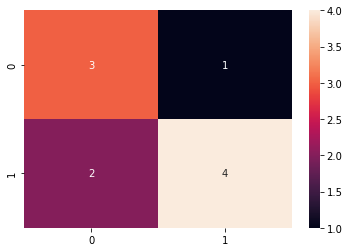

In [3]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

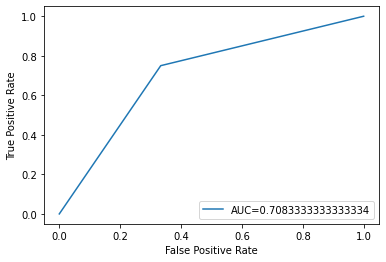

In [4]:
from sklearn.preprocessing import LabelEncoder
# ترميز الصفوف
le = LabelEncoder()
actual=le.fit_transform(actual)
predicted = le.fit_transform(predicted)
from sklearn import metrics
import matplotlib.pyplot as plt
# حساب المقاييس
fpr, tpr, _ = metrics.roc_curve(actual, predicted)
auc = metrics.roc_auc_score(actual, predicted)
# رسم المنحني
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
y_true = [15, 30, 40, 55, 75, 90]
y_pred = [26, 32, 44, 50, 62, 74]
print ('RMSE :{:.2f}'.format(sqrt(mean_squared_error (y_true, y_pred))))
print ('MAE :{:.2f}'.format(mean_absolute_error(y_true, y_pred)))


RMSE :9.92
MAE :8.50


In [6]:
# مجموعة بيانات 
# أزهار السوسن
from sklearn.datasets import load_iris
# مكتبة تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split
# مكتبة مُصنف بايز
from sklearn.naive_bayes import GaussianNB
# مكتبات مقاييس التقييم
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# تحميل البيانات 
X, y = load_iris(return_X_y=True)
# تقسيم البيانات إلى تدريب و اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# بناء مصنف بايز
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# حساب مقاييس التقييم
# بمقارنة بيانات الاختبار
# مع تنبؤ المصنف
print ('Accuracy Score :{:.2f}'.format(accuracy_score(y_test, y_pred)*100))
print ('Precision Score :{:.2f}'.format(precision_score(y_test, y_pred, average='macro')*100))
print ('Recall Score :{:.2f}'.format(recall_score(y_test, y_pred, average='macro')*100))
print ('F1 Score :{:.2f}'.format(f1_score(y_test, y_pred, average='macro')*100))


Accuracy Score :100.00
Precision Score :100.00
Recall Score :100.00
F1 Score :100.00


In [7]:
# مجموعة بيانات 
# أزهار السوسن
from sklearn.datasets import load_iris
# مكتبة تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split
# مكتبة مُصنف بايز
from sklearn.naive_bayes import GaussianNB
# مكتبة التقييم المتقاطع
from sklearn.model_selection import cross_val_score
# مكتبات مقاييس التقييم
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# تحميل البيانات 
X, y = load_iris(return_X_y=True)
# تقسيم البيانات إلى تدريب و اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# بناء مصنف بايز
gnb = GaussianNB()
# حساب مقياس الصحة
scores = cross_val_score(gnb, X, y, cv=5, scoring="accuracy")
print(scores)
# حساب المتوسط
meanScore = scores.mean()
print(meanScore * 100)


[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
95.33333333333334


In [8]:
# مكتبة أطر البيانات
import pandas as pd
# مكتبة التقييم المتقاطع
from sklearn.model_selection import cross_val_score
# دالة لمقارنة مجموعة من النماذج
def cv_comparison_classification(models, X, y, cv):
    # تهيئة إطار بيانات لمقاييس التقييم
    cv_df = pd.DataFrame()
    # الدوران على النماذج
    # تطبيق التقييم المتقاطع
    for model in models:
        #  حساب مقياس الصحة لكل حاوية
        acc = cross_val_score(model, X, y,scoring='accuracy',  cv=cv)
        # حساب متوسط الصحة للنموذج
        acc_avg = round(acc.mean(), 4)
        # كتابة النتيجة في إطار البيانات
        cv_df[str(model)] = [ acc_avg]
        cv_df.index = ['Accuracy']
    return cv_df

In [9]:
# مجموعة بيانات 
# أزهار السوسن
from sklearn.datasets import load_iris
# مصنف بايز
from sklearn.naive_bayes import GaussianNB
# مصنف شجرة القرار
from sklearn.tree import DecisionTreeClassifier
# مصنف أقرب الجيران
from sklearn.neighbors import KNeighborsClassifier
# تحميل البيانات 
X, y = load_iris (return_X_y=True)
# إنشاء متغيرات النماذج
mlr_g = GaussianNB()
mlr_d = DecisionTreeClassifier()
mlr_k = KNeighborsClassifier()
# وضع النماذج في قائمة
models = [mlr_g, mlr_d, mlr_k]
# استدعاء دالة المقارنة
comp_df = cv_comparison_classification(models, X, y, 4)
# إظهار إطار البيانات للمقارنه
print(comp_df)


          GaussianNB()  DecisionTreeClassifier()  KNeighborsClassifier()
Accuracy        0.9534                      0.96                  0.9667
